# Compare Lagrangian Output files

In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import cmocean
from salishsea_tools import viz_tools

%matplotlib inline

In [2]:
original = xr.open_dataset('ashu_testing/shihan_original.nc')
new = xr.open_dataset('ashu_testing/nc_replicate.nc')
prec = xr.open_dataset('ashu_testing/precise_coords.nc')

In [3]:
def plot_diff(data1, data2, ylabel):
    
    overall_max = max(data1.max(), data2.max())
    overall_min = min(data1.min(), data2.min())
    fig = plt.figure(figsize = (20,6))

    fig.patch.set_facecolor('xkcd:black')
    COLOR = 'white'
    mpl.rcParams['text.color'] = COLOR
    mpl.rcParams['axes.labelcolor'] = COLOR
    mpl.rcParams['xtick.color'] = COLOR
    mpl.rcParams['ytick.color'] = COLOR
    cmap = cmocean.cm.matter

    ax1 = plt.subplot(1,3,1)
    plt.pcolormesh(data1, vmin = overall_min, vmax = overall_max, cmap = cmap)
    plt.title('Original')
    cbar = plt.colorbar(extend = 'both')
    cbar.ax.get_yaxis().labelpad = 15
    cbar.ax.set_ylabel(ylabel, rotation=270)
    viz_tools.set_aspect(ax1)

    ax2 = plt.subplot(1,3,2)
    plt.pcolormesh(data2, vmin = overall_min, vmax = overall_max, cmap = cmap)
    plt.title('Replicate')
    cbar = plt.colorbar(extend = 'both')
    cbar.ax.get_yaxis().labelpad = 15
    cbar.ax.set_ylabel(ylabel, rotation=270)
    viz_tools.set_aspect(ax2)

    ax3 = plt.subplot(1,3,3)
    plt.pcolormesh(data2 - data1, cmap = 'RdBu')
    plt.title('Diff')
    cbar = plt.colorbar(extend = 'both')
    cbar.ax.get_yaxis().labelpad = 15
    cbar.ax.set_ylabel(ylabel, rotation=270)
    viz_tools.set_aspect(ax3)

    fig.tight_layout()

In [7]:
def plot_thickness():
    mask = xr.open_dataset('https://salishsea.eos.ubc.ca/erddap/griddap/ubcSSn2DMeshMaskV17-02').tmaskutil.isel(time = 0).values[0:896:,0:396]
    shi_time = original.time.values
    ash_time = new.time.values
    prec_time = prec.time.values
    fig = plt.figure(figsize = (20,60))
    for i, t in enumerate([0,1,10,25,50,100,125,150]):
        stime = shi_time[t]
        ptime = prec_time[t]
        t += 1
        i += 1

        ax = plt.subplot(10,2,2*i-1)
        shi = original.Thickness_2D.isel(time = t).sel(grid_y=slice(450, 550), grid_x=slice(250, 350)).values
        plt.pcolormesh(shi, cmap = cmocean.cm.dense)
        cbar = plt.colorbar()
        cbar.ax.get_yaxis().labelpad = 15
        cbar.ax.set_ylabel('Oil thickness (microns)', rotation=270)
        plt.contour(mask[450: 550,250:350], levels = [-0.1, 0.1])
        plt.title(f'Nextcloud, time: {stime}, max thick {shi.max()}, min thick {shi.min()}')


        ax2 = plt.subplot(10,2, 2*i)
        ashu1 = prec.Thickness_2D.isel(time = t).sel(grid_y=slice(450, 550), grid_x=slice(250, 350)).values
        plt.pcolormesh(ashu1, cmap = cmocean.cm.dense)
        cbar = plt.colorbar()
        cbar.ax.get_yaxis().labelpad = 15
        cbar.ax.set_ylabel('Oil thickness (microns)', rotation=270)
        plt.contour(mask[450: 550,250:350], levels = [-0.1, 0.1])
        plt.title(f'Using shihan Coords, time: {ptime}, max thick {ashu1.max()}, min thick {ashu1.min()}')
        
    plt.tight_layout()
    plt.savefig('oil_thickness.pdf', bbox_inches = 'tight')

In [8]:
def plot_2d_conc():
    mask = xr.open_dataset('https://salishsea.eos.ubc.ca/erddap/griddap/ubcSSn2DMeshMaskV17-02').tmaskutil.isel(time = 0).values[0:896:,0:396]
    shi_time = original.time.values
    ash_time = new.time.values
    fig = plt.figure(figsize = (20,60))
    for i, t in enumerate([0,1,10,25,50,100,125,150]):
        stime = shi_time[t]
        atime = ash_time[t]
        t += 1
        i += 1

        ax = plt.subplot(10,2,2*i-1)
        shi = original.OilConcentration_2D.isel(time = t).sel(grid_y=slice(450, 550), grid_x=slice(250, 350)).values
        plt.pcolormesh(shi, cmap = cmocean.cm.dense)
        cbar = plt.colorbar()
        cbar.ax.get_yaxis().labelpad = 15
        cbar.ax.set_ylabel('Oil concentration (ppm)', rotation=270)
        plt.contour(mask[450: 550,250:350], levels = [-0.1, 0.1])
        plt.title(f'Nextcloud, time: {stime}, max thick {shi.max()}, min thick {shi.min()}')

        ax1 = plt.subplot(10,2, 2*i)
        ashu = new.OilConcentration_2D.isel(time = t).sel(grid_y=slice(450, 550), grid_x=slice(250, 350)).values
        plt.pcolormesh(ashu, cmap = cmocean.cm.dense)
        cbar = plt.colorbar()
        cbar.ax.get_yaxis().labelpad = 15
        cbar.ax.set_ylabel('Oil concentration (ppm)', rotation=270)
        plt.contour(mask[450: 550,250:350], levels = [-0.1, 0.1])
        plt.title(f'Cedar Run, time: {atime}, max thick {ashu.max()}, min thick {ashu.min()}')


        plt.tight_layout()


# Visualising the 2D thickness of oil at time stamps 0,1,10,25,50,100,125,150

### On the left are the nextcloud (Shihan's) results, in the middle is my run using the approx coordinates of the oil spill and on the right is my run using the spill locations from Shihan's paper

<ul>
    <li>The initial thickness of oil is over 50X higher for my run at the same timestamp compared to shihans</li>
    <li>As the thickness of my oil decreases over time, Shihan's increases</li>
    <li> The final maximum thickness on the left also looks implausible compared to the initial max thickness</li>
</ul>


In [83]:
8 * 1 * 1  * 1.18281

9.46248

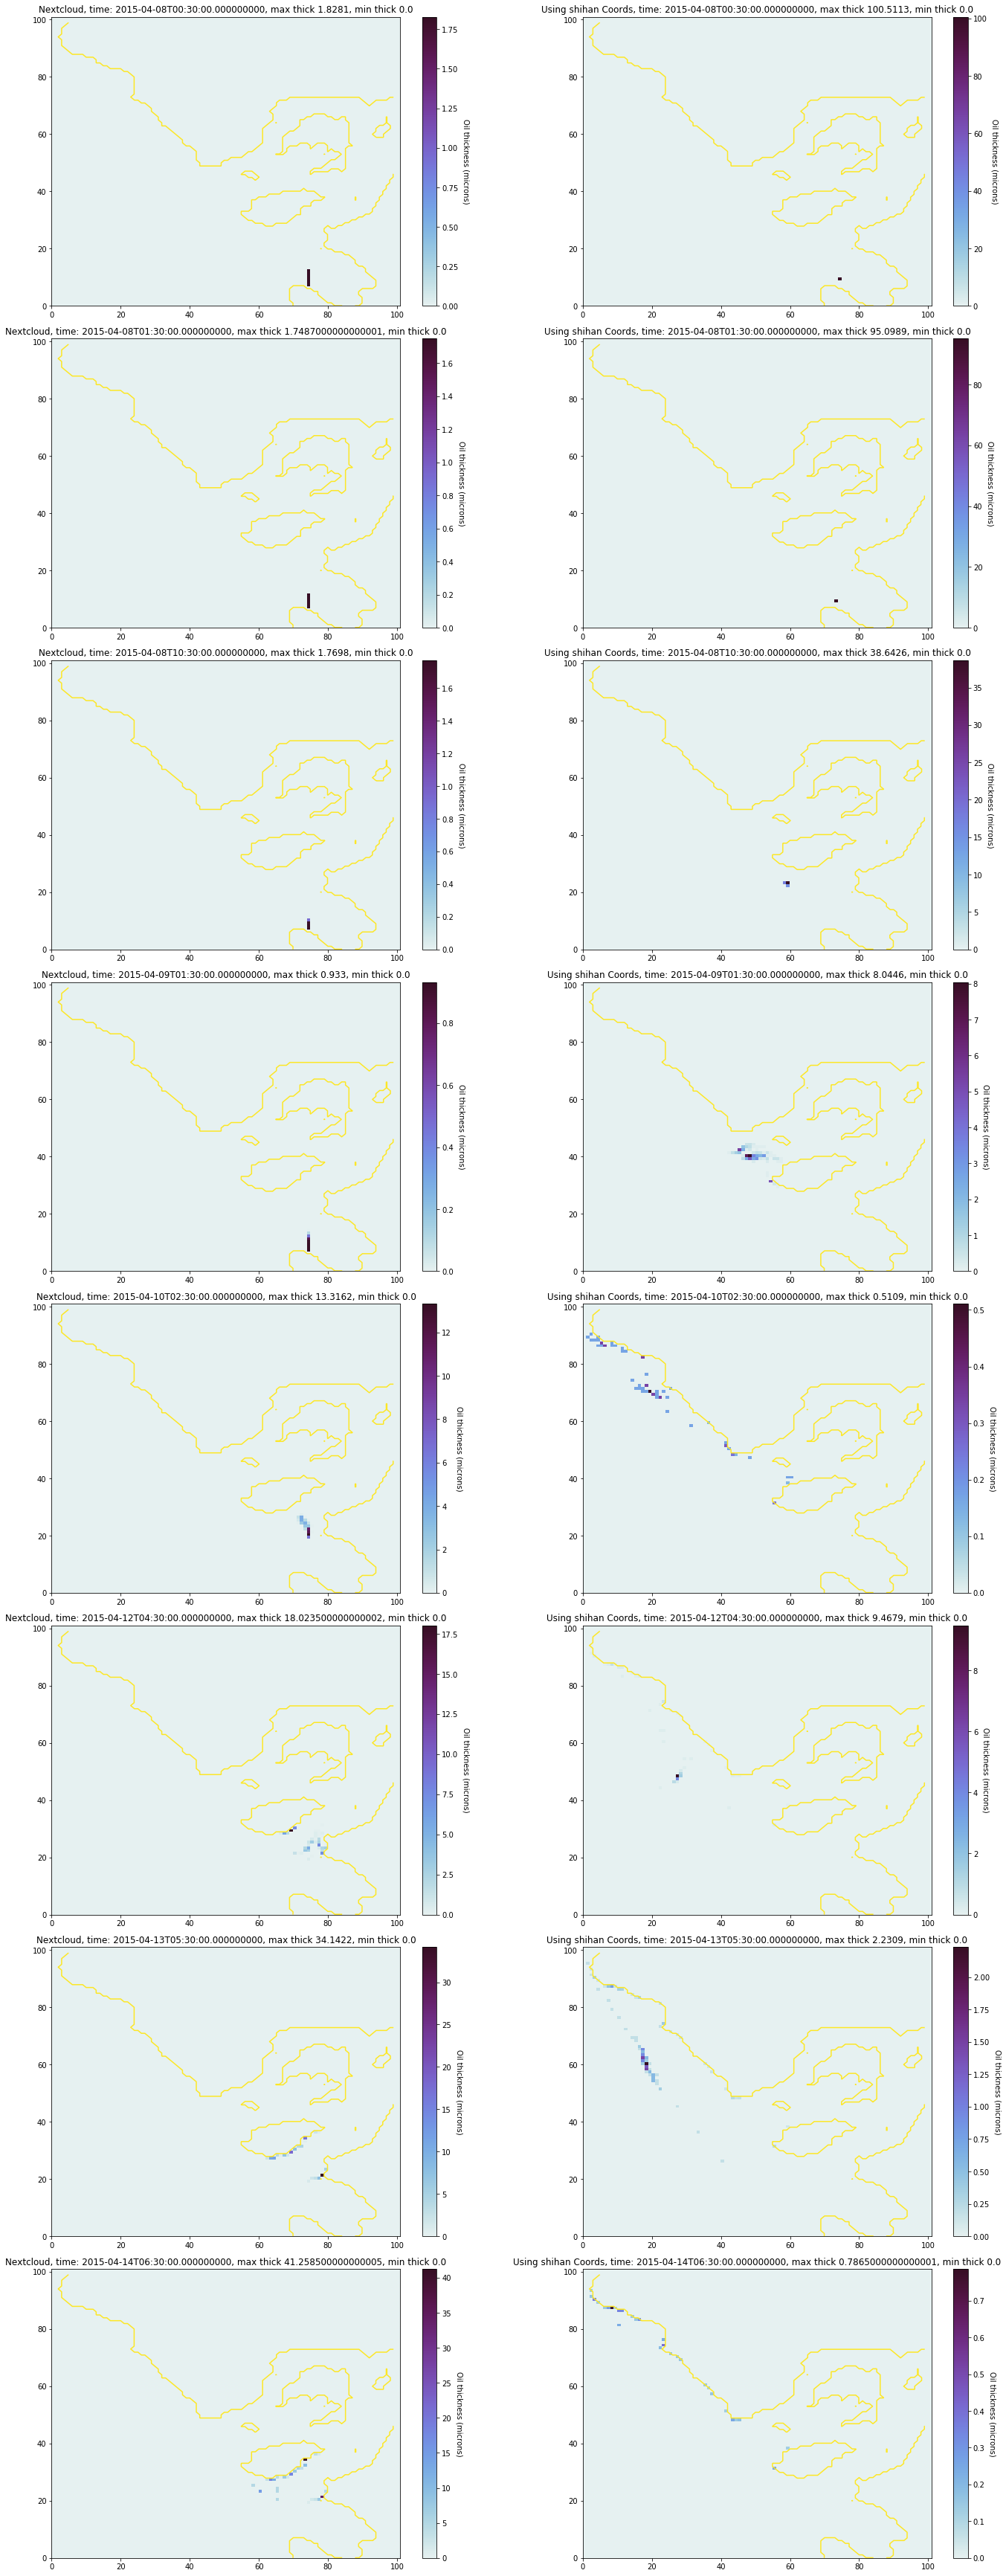

In [9]:
plot_thickness()

# Neither runs have any dissolution around the spill location

In [30]:
original.Dissolution_3D.sel(grid_y=slice(350, 550), grid_x=slice(250, 350)).values.sum()

0.0

In [31]:
new.Dissolution_3D.sel(grid_y=slice(350, 550), grid_x=slice(250, 350)).values.sum()

0.0

# Visualising 2D concentration time stamps 0,1,10,25,50,100,125,150

### as before, it does some very questionable things 

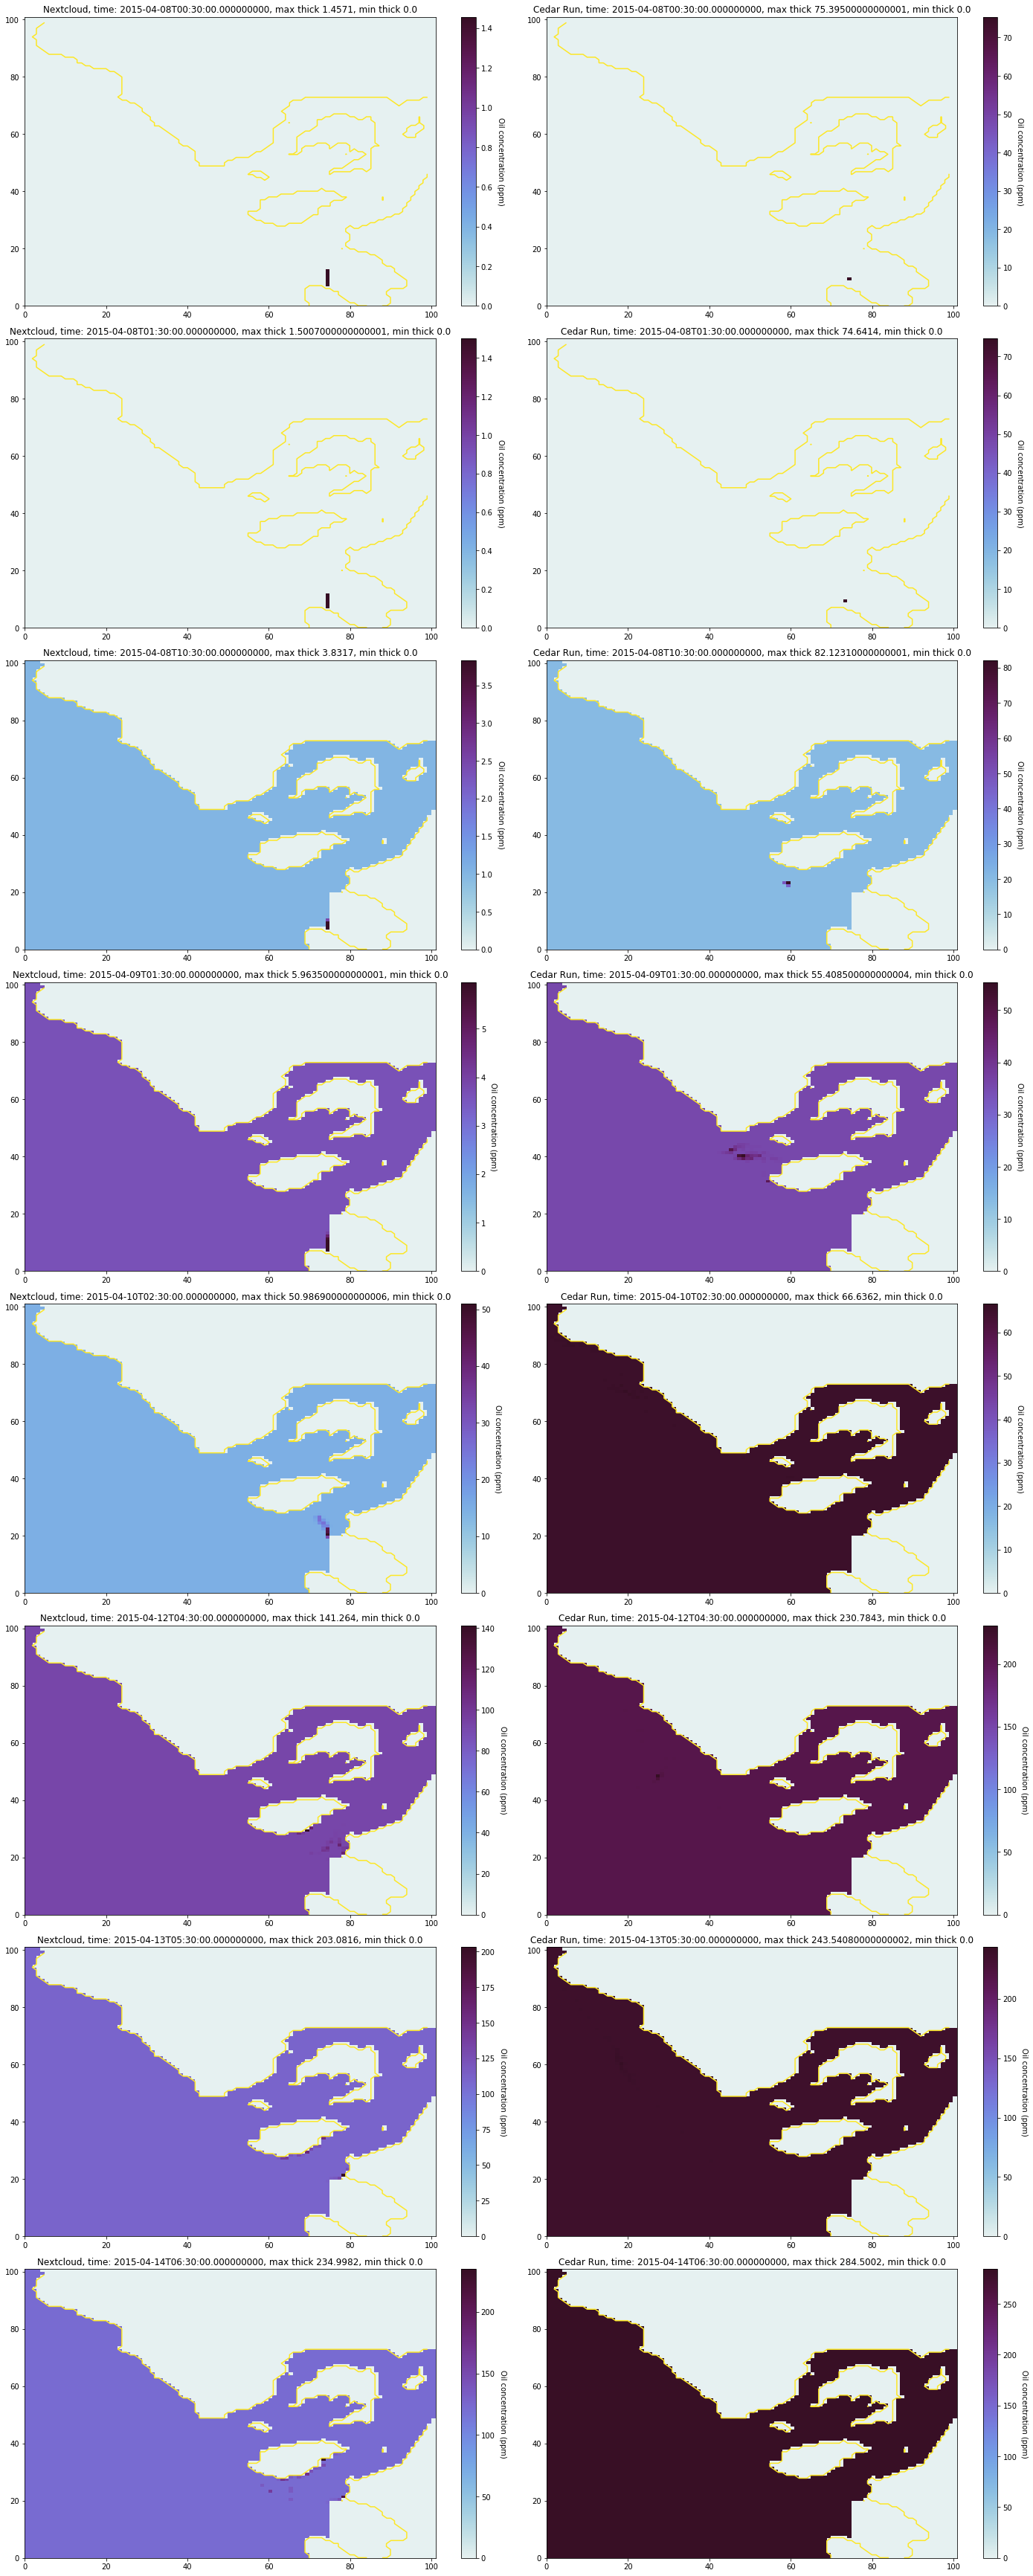

In [98]:
plot_2d_conc()